<a href="https://colab.research.google.com/github/VoLENguyen/FS_MNIST/blob/main/fshmnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow:{tf.__version__}\nKeras: {keras.__version__}")

Tensorflow:2.11.0
Keras: 2.11.0


1.Load data


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
class_name = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
              "Sneaker","Bag","Ankle boot"]

In [9]:
class_name[y_train[0]]

'Ankle boot'

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import  random as rd

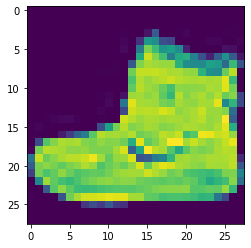

In [11]:
plt.imshow(x_train[0])

Hàm

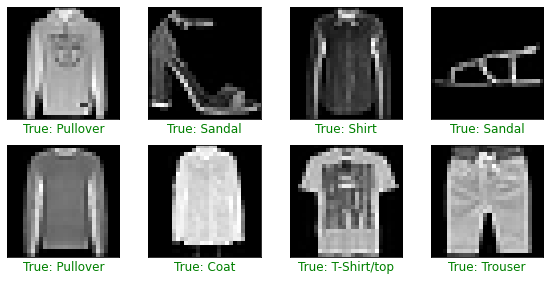

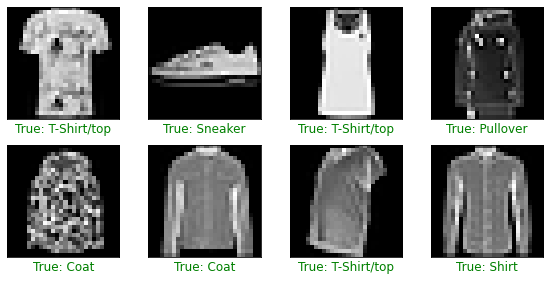

In [45]:
#from pyparsing.helpers import Optional
from typing import Optional
def plot_data(x_data:np.ndarray,
              y_data : np.ndarray,y_proba:Optional[np.ndarray] = None) -> None:
  nrows,ncols =  2,4
  fig,axes = plt.subplots(nrows,ncols,figsize = (8,4))
  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx// ncols,idx % ncols]
    
    img_idx = rd.randint(0,len_x)

    ax.imshow(x_data[img_idx],cmap = 'gray')
    ax.set(xticks = [],yticks = [])
    color = 'green'
    true_label_str = f"True: {class_name[y_data[img_idx]]}"
    if y_proba is not None:
      predicted_index = np.argmax(y_proba[img_idx])
      prediction_labels = class_name[predicted_index]
      color = 'red' if predicted_index != y_data[img_idx] else color 
      predicted_label_str = f"\nPredicted:{prediction_labels}"
    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color = color,fontsize = 12)
  plt.tight_layout()
  plt.show()

plot_data(x_train,y_train)
plot_data(x_test,y_test)

# ***2.Xử lý hình ảnh***

In [13]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255


In [14]:
x_train.dtype
x_test.dtype

dtype('float32')

In [15]:
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)


In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
class_num = len(class_name)
y_train_label = keras.utils.to_categorical(y_train,class_num)
y_test_label = keras.utils.to_categorical(y_test,class_num)

In [18]:
y_train[0],y_test_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# **Build 1 mang  ANN**

In [19]:
from tensorflow.keras import layers

In [20]:
input_shape = (28,28,1)

In [21]:
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), 
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(class_num,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [23]:
epochs = 50
batch_size = 200
history = model.fit(x_train, y_train_label, 
          epochs = epochs,
          batch_size=batch_size,
          validation_split= 0.1
          )

Epoch 1/50
270/270 [==============================] - 4s 5ms/step - loss: 0.6047 - accuracy: 0.7805 - val_loss: 0.4170 - val_accuracy: 0.8460
Epoch 2/50
270/270 [==============================] - 2s 6ms/step - loss: 0.4018 - accuracy: 0.8508 - val_loss: 0.3657 - val_accuracy: 0.8658
Epoch 3/50
270/270 [==============================] - 1s 5ms/step - loss: 0.3516 - accuracy: 0.8681 - val_loss: 0.3559 - val_accuracy: 0.8712
Epoch 4/50
270/270 [==============================] - 1s 5ms/step - loss: 0.3173 - accuracy: 0.8810 - val_loss: 0.3444 - val_accuracy: 0.8748
Epoch 5/50
270/270 [==============================] - 1s 5ms/step - loss: 0.2969 - accuracy: 0.8887 - val_loss: 0.3164 - val_accuracy: 0.8848
Epoch 6/50
270/270 [==============================] - 2s 6ms/step - loss: 0.2805 - accuracy: 0.8937 - val_loss: 0.3077 - val_accuracy: 0.8895
Epoch 7/50
270/270 [==============================] - 2s 6ms/step - loss: 0.2658 - accuracy: 0.9006 - val_loss: 0.3308 - val_accuracy: 0.8828
Epoch 

In [24]:
his_dict =history.history 

In [25]:
his_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
train_loss, val_loss  = his_dict['loss'],his_dict['val_loss']
train_acc, val_acc  = his_dict['accuracy'],his_dict['val_accuracy']



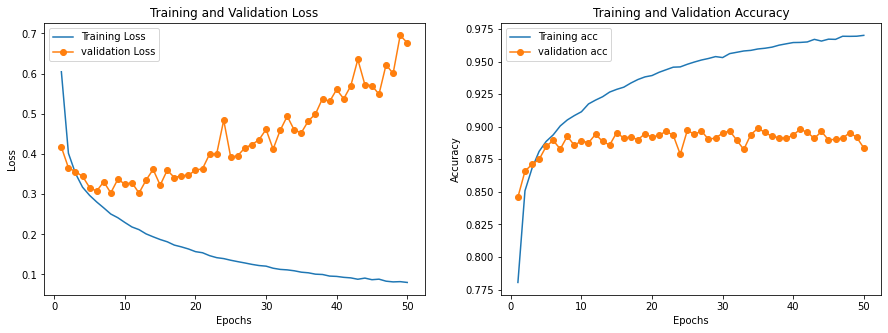

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
epochs_runs = [i+1 for i in range(epochs)]
ax1.plot(epochs_runs,train_loss,label="Training Loss")
ax1.plot(epochs_runs,val_loss,label="validation Loss", marker = 'o')
ax1.set(title = 'Training and Validation Loss' ,xlabel = 'Epochs',ylabel = 'Loss')
ax1.legend()


ax2.plot(epochs_runs,train_acc,label="Training acc")
ax2.plot(epochs_runs,val_acc,label="validation acc", marker = 'o')
ax2.set(title = 'Training and Validation Accuracy' ,xlabel = 'Epochs',ylabel = 'Accuracy')
ax2.legend()
plt.show()

#4.Model Evaluation

In [32]:
score = model.evaluate(x_test,y_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.6833 - accuracy: 0.8834


In [33]:
print(f"Test score: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test score: 0.6833
Test Accuracy: 0.8834


#5.Prediction


In [34]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 [==============================] - 0s 128ms/step


In [36]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
prediction = np.argmax(y_proba,axis = 1)

In [40]:
[class_name[pred] for pred in prediction]

['Ankle boot', 'Pullover', 'Trouser']

In [46]:
y_proba = model.predict(x_test)

313/313 [==============================] - 0s 2ms/step


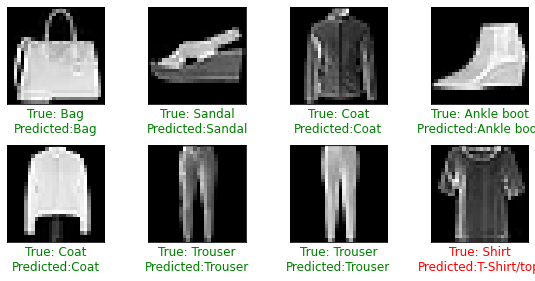

In [51]:
plot_data(x_test,y_test,y_proba)

#End